<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231010_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - sklearn

        데이터 분리 : 훈련, 검증, 테스트 (K-Fold, cross_val_score)

        하이퍼파라미터 : GridSearchCV

        

    - 평가

        정확도, 오차행렬

        정밀도, 재현율

        F1 스코어, ROC 곡선, AUC
    - 분류

        결정트리

        랜덤포레스트(앙상블)
        
        XGBoost

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집
    - 텍스트 처리

8. 딥러닝

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 %matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
iris = load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2)

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

In [ ]:
grid_dt_clf = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)

In [ ]:
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [ ]:
grid_dt_clf.cv_results_

In [ ]:
grid_dt_clf.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [ ]:
grid_dt_clf.best_score_

0.9666666666666667

In [ ]:
model = grid_dt_clf.best_estimator_

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, pred)

0.9333333333333333

과적합 : 훈련데이터에 모델이 맞춰저 있어, 일반데이터(테스트 데이터)에서 낮은 성능을 보이는 것

#데이터 표준화

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

StandardScaler

 새로운  x = (x - 평균)/표준편차

In [ ]:
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

In [ ]:
iris_scaled.shape

(150, 4)

In [ ]:
iris_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [ ]:
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

In [ ]:
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [ ]:
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [ ]:
iris_df_scaled.mean()

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

In [ ]:
iris_df_scaled.var()

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


MinMaxScaler

x_new = (x - min(x)) / (max(x) - min(x))

In [ ]:
iris_df.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [ ]:
iris_df.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(iris_df)

MinMaxScaler()

In [ ]:
iris_scaled = scaler.transform(iris_df)

In [ ]:
iris_df_mix_max = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

In [ ]:
iris_df_mix_max.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
iris_df_mix_max.min()

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

In [ ]:
iris_df_mix_max.max()

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64

In [ ]:
train_array = np.arange(0, 11).reshape(-1,1)

In [ ]:
train_array

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
test_array = np.arange(0, 6).reshape(-1,1)

In [ ]:
test_array

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array) #scaler.fit_transform(train_array)
train_scaled = scaler.transform(train_array)

In [ ]:
train_scaled # 10 -> 1, 5-> 0.5

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

In [ ]:
test_scaled # 5 -> 1

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
test_scaled_2 = scaler.transform(test_array)
test_scaled_2

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5]])

학습데이터로 fit 된 scaler를 사용하여 test 데이터를 transform 시키자

 A :  훈련, Scaler

 B : test

 C : 일반데이터

In [ ]:
ls ./drive/MyDrive/data/ti*

./drive/MyDrive/data/tips.csv  ./drive/MyDrive/data/titanic_train.csv


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
titanic = pd.read_csv('./drive/MyDrive/data/titanic_train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y_titanic = titanic['Survived']

In [ ]:
X_titanic = titanic.drop('Survived', axis=1)

In [ ]:
X_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def adj_scale(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_array = scaler.transform(df)
    df_scaled = pd.DataFrame(data=scaled_array, columns = df.columns)
    return df_scaled

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    df = adj_scale(df)
    return df

In [ ]:
X_titanic = transform_features(X_titanic)

In [ ]:
X_titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.875,1.000000
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.250,0.000000
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.875,1.000000
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.250,1.000000
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.875,1.000000
...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.875,1.000000
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.125,1.000000
888,1.0,0.0,0.367921,0.125,0.333333,0.045771,0.875,1.000000
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.250,0.000000


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=2)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 8), (712,), (179, 8), (179,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 30 to 168
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Cabin     712 non-null    int64  
 7   Embarked  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

In [ ]:
def fit_predict(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    return (accuracy_score(y_test, pred))

In [ ]:
fit_predict(dt_clf, X_train, y_train, X_test, y_test )

0.8044692737430168

In [ ]:
fit_predict(rf_clf, X_train, y_train, X_test, y_test )

0.7988826815642458

In [ ]:
fit_predict(lr_clf, X_train, y_train, X_test, y_test )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.776536312849162

1. K-Fold, dt_clf, 사용해서 score 값 산출, n_splits=5

2. cross_val_score, dt_clf, 사용, score 값 산출, cv = 5

3. GridSearchCV, dt_clf, best_estimator_ 산출한 scoe 값, cv=5

    {'max_depth':[1,2,3,5,10], 'min_samples_split':[2,3,5]}

데이터 = test + train = test + (validation+train)

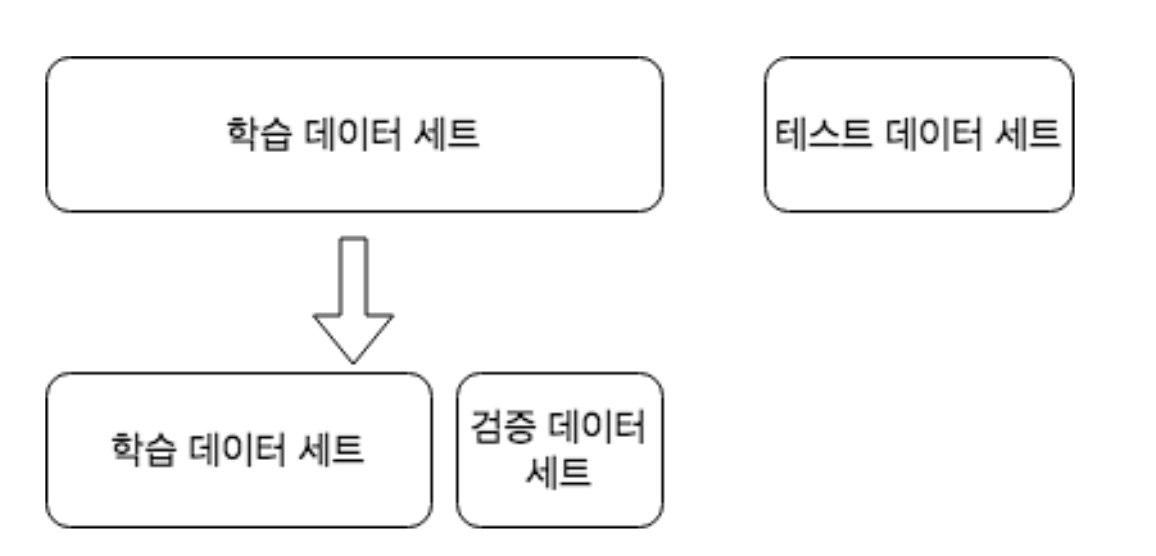

K-Fold 교차 검증

In [ ]:
X_titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [ ]:
y_titanic

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=2)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
30,1,1,40.000000,0,0,27.7208,7,0
10,3,0,4.000000,1,1,16.7000,6,3
873,3,1,47.000000,0,0,9.0000,7,3
182,3,1,9.000000,4,2,31.3875,7,3
876,3,1,20.000000,0,0,9.8458,7,3
...,...,...,...,...,...,...,...,...
534,3,0,30.000000,0,0,8.6625,7,3
584,3,1,29.699118,0,0,8.7125,7,0
493,1,1,71.000000,0,0,49.5042,7,0
527,1,1,29.699118,0,0,221.7792,2,3


In [ ]:
def fit_predict(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    return (accuracy_score(y_test, pred))

In [ ]:
n_iter=0
kfold = KFold(n_splits=5)
score = []
dt_clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=2)
for train_index, test_index in kfold.split(X_train):
    X_train = X_titanic.iloc[train_index]
    X_test = X_titanic.iloc[test_index]
    y_train = y_titanic.iloc[train_index]
    y_test = y_titanic.iloc[test_index]
    s_item = fit_predict(dt_clf, X_train, y_train, X_test, y_test)
    score.append(s_item)
    n_iter+=1
    print(n_iter, ' : ', s_item)
np.mean(score)
print(np.mean(score))

pred = dt_clf.predict(X_test)
print('final : ', accuracy_score(y_test, pred))

1  :  0.7972027972027972
2  :  0.7762237762237763
3  :  0.823943661971831
4  :  0.7605633802816901
5  :  0.7676056338028169
0.7851078498965822
final :  0.7676056338028169


In [ ]:
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

In [ ]:
dt_clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=2)

In [ ]:
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
print(scores)
np.mean(scores)

[0.79020979 0.81118881 0.75352113 0.73943662 0.73943662]


0.766758593519157

In [ ]:
scores = cross_val_score(dt_clf, X_titanic, y_titanic, cv=kfold)
print(scores)
np.mean(scores)

[0.77094972 0.78089888 0.79775281 0.76966292 0.81460674]


0.7867742137969994

GridSearchCV 사용

In [ ]:
parameters = {'max_depth':[1,2,3,5,10], 'min_samples_split':[2,3,5]}

In [ ]:
dt_clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=11)

In [ ]:
grid_tree = GridSearchCV(dt_clf, param_grid=parameters, cv=5)

In [ ]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5, 10],
                         'min_samples_split': [2, 3, 5]})

In [ ]:
grid_tree.best_score_

0.8005811090318133

In [ ]:
pred = grid_tree.best_estimator_.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8715083798882681

In [ ]:
grid_tree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

#평가

## 정확도

$$ 정확도(Accuracy)  = {예측이\ 맞은\ 자료의\ 수 \over 전체\ 예측\ 자료\ 수} $$

이진(0, 1) 분류의 경우 정확도가 잘 못 된 정보를 줄 수 있다.

In [ ]:
X_titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.875,1.000000
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.250,0.000000
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.875,1.000000
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.250,1.000000
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.875,1.000000
...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.875,1.000000
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.125,1.000000
888,1.0,0.0,0.367921,0.125,0.333333,0.045771,0.875,1.000000
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.250,0.000000


In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Survived'>

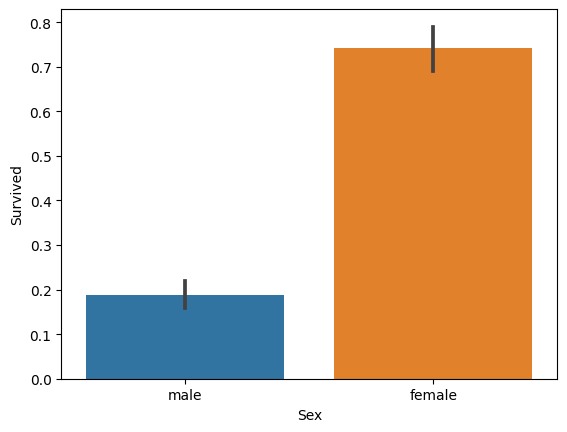

In [ ]:
sns.barplot(x='Sex', y = 'Survived', data=titanic)

In [ ]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [ ]:
titanic = pd.read_csv('./drive/MyDrive/data/titanic_train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y_titanic = titanic['Survived']

In [ ]:
X_titanic = titanic.drop('Survived', axis=1)

In [ ]:
X_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def adj_scale(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_array = scaler.transform(df)
    df_scaled = pd.DataFrame(data=scaled_array, columns = df.columns)
    return df_scaled

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    #df = adj_scale(df)
    return df

In [ ]:
X_titanic = transform_features(X_titanic)

In [ ]:
X_titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic)

In [ ]:
mcf = MyDummyClassifier()
mcf.fit(X_train, y_train)
pred = mcf.predict(X_test)
accuracy_score(y_test, pred)

0.7623318385650224

#TN, TP, FN, FP

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.3 MB/s eta 0:00:00


In [ ]:
import mglearn

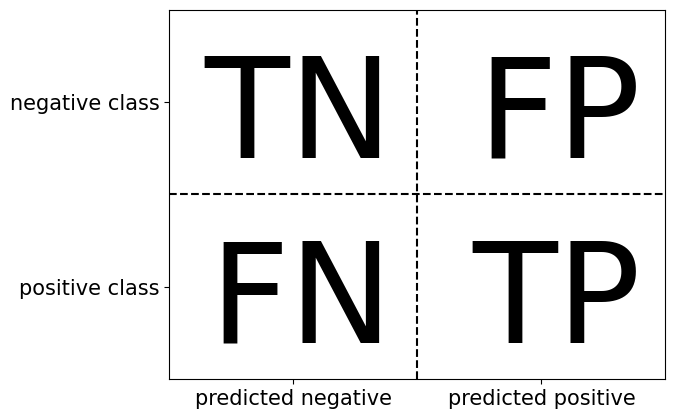

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

N=0, P=1, 모두 예측값 기준

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, pred)

array([[118,  20],
       [ 33,  52]])

$$ accuracy = {TN + TP \over TN+TP+FN+FP }
$$

$$
precision = {TP \over TP+FP}
$$

precision : 1로 예측한 것중 1로 맞춘 비율, 최대값 조건

$$
precision : FP \downarrow
$$

$$
recall = {TP \over TP+FN}
$$

recall : 실제값 1중 1로 맞춘 비율, 최대값 조건

$$
reacll : FN \downarrow
$$

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(confusion, accuracy, precision, recall)

In [ ]:
lr_clf = LogisticRegression(max_iter=5000, random_state=2)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[120  18]
 [ 28  57]] 0.7937219730941704 0.76 0.6705882352941176


precision과 recall 값은 확률의 임계값으로 조절 할 수 있다.

확률 = 어느 한 클래스에 속하게 될 확률

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)

In [ ]:
pred_proba[5:8], pred[5:8]

(array([[0.88966713, 0.11033287],
        [0.10692503, 0.89307497],
        [0.41697234, 0.58302766]]),
 array([0, 1, 1]))

In [ ]:
pred_proba.shape, pred.shape

((223, 2), (223,))

In [ ]:
np.concatenate([pred_proba[5:8], pred[5:8, np.newaxis]], axis=1)

array([[0.88966713, 0.11033287, 0.        ],
       [0.10692503, 0.89307497, 1.        ],
       [0.41697234, 0.58302766, 1.        ]])

문턱값 사용하는 클래스 : Binarizer

In [ ]:
from sklearn.preprocessing import Binarizer

x = [[1, -1, -2], [2, 0, 0], [0, 1.1, 1.5]]
x, type(x)

([[1, -1, -2], [2, 0, 0], [0, 1.1, 1.5]], list)

In [ ]:
x

[[1, -1, -2], [2, 0, 0], [0, 1.1, 1.5]]

In [ ]:
binar = Binarizer(threshold=1.1)
binar.fit_transform(x)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
binar = Binarizer(threshold=0.5)
y_binar = binar.fit_transform(pred_proba)
y_binar[:, 1]

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1.])

In [ ]:
y_test.shape, y_binar[:, 1].shape

((223,), (223,))

In [ ]:
get_clf_eval(y_test, y_binar[:, 1])

[[120  18]
 [ 28  57]] 0.7937219730941704 0.76 0.6705882352941176


In [ ]:
def get_eval_binar(thresholds, y_tests, pred_probas):
    binar = Binarizer(threshold=thresholds)
    y_binar = binar.fit_transform(pred_probas)
    print('====', thresholds, ' : ')
    get_clf_eval(y_tests, y_binar[:, 1] )

In [ ]:
thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]
for i in thresholds:
    get_eval_binar(i, y_test, pred_proba)

==== 0.4  : 
[[108  30]
 [ 25  60]] 0.7533632286995515 0.6666666666666666 0.7058823529411765
==== 0.45  : 
[[113  25]
 [ 26  59]] 0.7713004484304933 0.7023809523809523 0.6941176470588235
==== 0.5  : 
[[120  18]
 [ 28  57]] 0.7937219730941704 0.76 0.6705882352941176
==== 0.55  : 
[[123  15]
 [ 28  57]] 0.8071748878923767 0.7916666666666666 0.6705882352941176
==== 0.6  : 
[[127  11]
 [ 30  55]] 0.8161434977578476 0.8333333333333334 0.6470588235294118


#precision_recall_curve

- precision, recall, threshold 출력해주는 sklearn 클래스

- 입력 : y_test, pred_proba

- threshold : 0.11 ~ 0.95

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

In [ ]:
def pre_recall_plot(precisions, recalls, thresholds):
    fig, axes = plt.subplots()
    axes.plot(thresholds, precisions, 'k--',label = 'precision' )
    axes.plot(thresholds, recalls, 'g-', label='recall')
    axes.legend()
    axes.set_xlabel('Threshold')
    axes.set_ylabel('Precision & Recall')
    axes.grid()

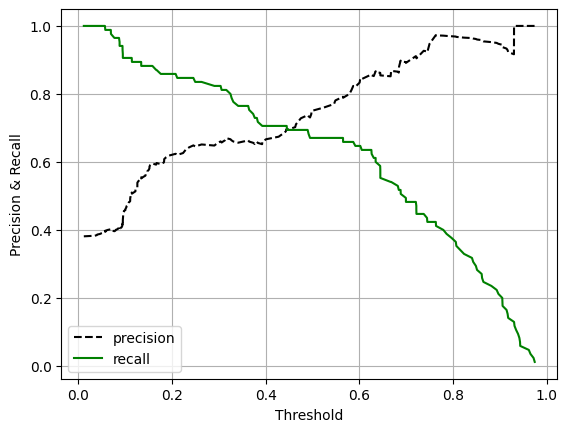

In [ ]:
pre_recall_plot(precisions[:thresholds.shape[0]], recalls[:thresholds.shape[0]], thresholds[:thresholds.shape[0]])

threshold = 1 이면, 모두 N 으로 예측

TN 모두 정답

FN 나머지

FP = 0

${TP \over TP + FP} = 1$

threshold = 0 이면, 모두 P 으로 예측

TP 모두 정답

FP 나머지

FN = 0

${TP \over TP + FN} = 1$

#F1 score

$$
F1 = { 2 \over {1 \over recall} + {1 \over precision}}
$$